In [1]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit import Aer,IBMQ
from qiskit import execute
from qiskit.tools import visualization
from qiskit.tools.visualization import circuit_drawer, plot_histogram
import matplotlib.pyplot as plt
from executeCircuit import execute_locally,extractClassical
from qOracles import searchOracle
from qiskit.aqua.components.oracles import Oracle
from qiskit.aqua.components.initial_states import Custom
from qiskit.aqua.algorithms import Grover
import math 
import numpy as np

In [2]:
n=4
index = 4
iterations = math.ceil(math.sqrt(2))

In [3]:
qstate = QuantumRegister(n)
out = QuantumRegister(1)
qaux = QuantumRegister(n)

qc = QuantumCircuit(qstate,out)
qc.h(qstate)

In [4]:
backend = Aer.get_backend('statevector_simulator')


In [5]:
statevector = execute(qc, backend=backend,shots=1024).result().get_statevector()

In [6]:
stateV = np.asarray([statevector[i] for i in range(2**n)])
print(stateV)
print(statevector)

[0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j
 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]
[0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j
 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j
 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j
 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]


[0.        +0.j 0.        +0.j 0.70710678+0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


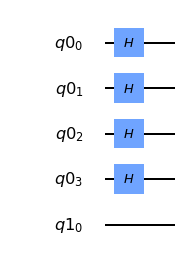

In [7]:
qc2 = QuantumCircuit(qstate,out,qaux)
state=[]
for i in range(2**n):
	if i == 4 or i == 2:
		state.append(complex(1/math.sqrt(2),0.0))
	else:
		state.append(complex(0.0,0.0))

state_np = np.asarray(state)
print(state_np)

quantum_state = Custom(n,state_vector=state_np)
#initial_state = Custom(n,state_vector= stateV)
oracle = searchOracle(variable_register=qstate,index=index)
alg = Grover(oracle,init_state=quantum_state, incremental=True)
#incremental=True)
qc.draw(output="mpl")

In [8]:
backend = Aer.get_backend('qasm_simulator')

zero=0
two=0
for i in range(10):
    result = alg.run(backend,shots=1024)
    measured_val = int(result['top_measurement'],2 )
    if measured_val == 2:
        two+=1
    elif measured_val == 0:
        zero+=1

print("ZERO - ",zero)    
print("FIFT - ",two)

#result = alg.run(backend,shots=1024)


ZERO -  0
FIFT -  0


In [9]:
measured_val = int(result['top_measurement'],2 )
print("result should be 15 - ",measured_val)

result should be 15 -  4


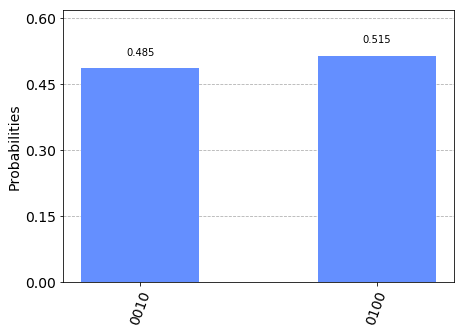

In [10]:
plot_histogram(result['measurement'])
